In [ ]:
# Напишите нейросеть для распознавания предметов на цветных фотографиях

from tensorflow.keras.datasets import cifar10 # Загружаем базу cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
from google.colab import files # Для работы с файлами
import numpy as np # Библиотека работы с массивами

import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы
from google.colab import drive # Для работы с Google Drive

%matplotlib inline

In [ ]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("Размер обучающей выборки")
print(x_train.shape, '\n')

print("Размер тестовой выборки")
print(x_test.shape)

Размер обучающей выборки
(50000, 32, 32, 3) 

Размер тестовой выборки
(10000, 32, 32, 3)


In [ ]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

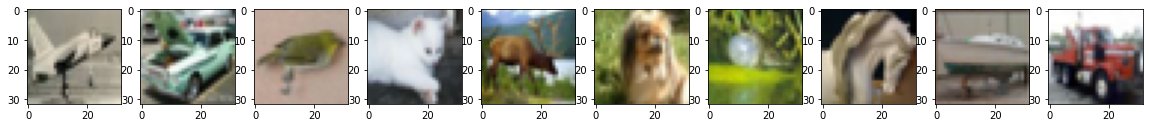

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [ ]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train[index][0]
  y += str(label) + "("+labels[label]+"); " # Сохраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображения

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
print(y_test.shape)

print("Обучающая выборка:")
print(y_train[5], "->", y_train[5])
print(y_train[234], "->", y_train[234])
print(y_train[69], "->", y_train[69])
print(y_train[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train[15], "->", y_train[15])
print(y_train[334], "->", y_train[334])
print(y_train[8477], "->", y_train[8477])
print(y_train[3768], "->", y_train[3768])


(10000, 10)
Обучающая выборка:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Преобразуем нашу картинку в последовательность цифр (выравнивание)

x_train = x_train.reshape(x_train.shape[0], 32*32*3) # Т.к. в используемом датасете иозображения в формате 32 на 32 пикселя на 3 цвета, то при выравнивании указываем те же параметры
x_test = x_test.reshape(x_test.shape[0], 32*32*3) # 

print("Размерность x_train: ", x_train.shape)
print("Размерность x_test: ", x_test.shape)

Размерность x_train:  (50000, 3072)
Размерность x_test:  (10000, 3072)


In [ ]:
# Нормализация картинок:

print("Изначальные значения:")
print(x_train[10][120:135])
print()

x_train = x_train / 255
x_test = x_test / 255

print("Значения после нормализации:")
print(x_train[10][120:135])

Изначальные значения:
[65 73 59 74 81 66 77 81 67 83 83 71 83 81 65]

Значения после нормализации:
[0.25490196 0.28627451 0.23137255 0.29019608 0.31764706 0.25882353
 0.30196078 0.31764706 0.2627451  0.3254902  0.3254902  0.27843137
 0.3254902  0.31764706 0.25490196]


In [ ]:
# Задаём batch_size # После работы с каким кол. изображений веса изменятся
batch_size = 512 

# Создаем последовательную модель нейронной сети
model = Sequential()
# Выравнивающий слой
model.add(Dense(3000, input_dim=3072, activation='relu')) # input_dim= количество входных нейронов
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Полносвязные скрытые слой
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Слой классификации
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3000)              9219000   
_________________________________________________________________
batch_normalization_3 (Batch (None, 3000)              12000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1536512   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [ ]:
# Обучаем нейросеть

#Обучаем сеть на данных cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/40
79/79 [==============================] - 3s 30ms/step - loss: 1.7764 - accuracy: 0.3778 - val_loss: 2.9860 - val_accuracy: 0.2737
Epoch 2/40
79/79 [==============================] - 2s 24ms/step - loss: 1.5650 - accuracy: 0.4478 - val_loss: 1.7828 - val_accuracy: 0.3777
Epoch 3/40
79/79 [==============================] - 2s 24ms/step - loss: 1.4840 - accuracy: 0.4726 - val_loss: 1.9143 - val_accuracy: 0.3258
Epoch 4/40
79/79 [==============================] - 2s 24ms/step - loss: 1.4251 - accuracy: 0.4950 - val_loss: 1.8134 - val_accuracy: 0.3675
Epoch 5/40
79/79 [==============================] - 2s 24ms/step - loss: 1.3822 - accuracy: 0.5113 - val_loss: 2.1265 - val_accuracy: 0.3026
Epoch 6/40
79/79 [==============================] - 2s 24ms/step - loss: 1.3433 - accuracy: 0.5223 - val_loss: 2.6994 - val_accuracy: 0.2244
Epoch 7/40
79/79 [==============================] - 2s 24ms/step - loss: 1.2994 - accuracy: 0.5379 - val_loss: 2.0074 - val_accuracy: 0.3263
Epoch 8/40
79

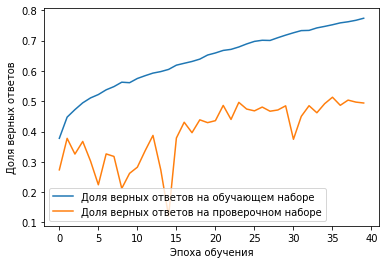

In [ ]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

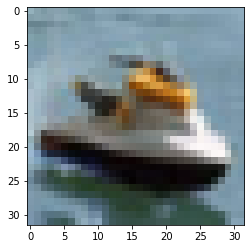

Выход сети:
[5.0660758e-03 1.9540901e-04 4.6236662e-04 1.6398761e-05 1.4234309e-06
 5.8631256e-05 3.0120331e-04 1.2453302e-05 9.7762442e-01 1.6261691e-02]

0 -> 0.0050660758279263973236083984375000000000
1 -> 0.0001954090112121775746345520019531250000
2 -> 0.0004623666172847151756286621093750000000
3 -> 0.0000163987606356386095285415649414062500
4 -> 0.0000014234309446692350320518016815185547
5 -> 0.0000586312562518287450075149536132812500
6 -> 0.0003012033121194690465927124023437500000
7 -> 0.0000124533016787609085440635681152343750
8 -> 0.9776244163513183593750000000000000000000
9 -> 0.0162616912275552749633789062500000000000

Распознано:  Корабль
Верный ответ:  Корабль


In [ ]:
# Подаем в нейросеть все картинки из тестовой выборки
prediction = model.predict(x_test)

# Выбираем номер для примера
n = random.randint(0,10000) #Размер тестовой выборки 1000 элементов

# Покажем картинку
img = x_test[n]
img = img*255 # Приводим изображение к ненорм. виду
img = img.reshape(32, 32, 3)
img = img.astype('uint8')
plt.imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение
plt.show()

print("Выход сети:")
print(prediction[n])
print()
for i in range(10):
  print(i,"->","{:.40f}".format(prediction[n][i]))
print() # С labels. Получаю верный ответ.
print("Распознано: ", labels[np.argmax(prediction[n])])
print("Верный ответ: ", labels[np.argmax(y_test[n])])

print() # Без labels. Получаю цифру соответствующую верному ответу.
print("Распознано: ", np.argmax(prediction[n]) )
print("Верный ответ: ", np.argmax(y_test[n]) )